# **Regression Task**

## **1. Importing all Python libraries needed**

In [ ]:
import pandas as pd # A common package for viewing tabular data
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
import numpy as np # A useful package for dealing with mathematical processes, we will be using it this week for vectors and matrices
import seaborn as sns # For plot styling
import sklearn.linear_model, sklearn.datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures # We will be using the imbuilt sclaing functions sklearn provides
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score # A library that can automatically perform data splitting for us
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, balanced_accuracy_score # Various classification metrics we may find useful

In [ ]:
# Below are a wide selection of tensorflow libraries we will need to construct our Neural networks.
from tensorflow.keras.activations import sigmoid, linear, relu # Activation functions we will use
from tensorflow.keras.models import Model, Sequential # Different mays of constructing models, we will primarily be covering the 'functional api' which uses `Model`
from tensorflow.keras.optimizers import Adam, SGD # We will be using the SGD optimiser today, though there are other options you may want to explore (such as Adam)
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy  # We will be using TFs MSE loss function for regression and BinaryCross Entropy for classification.
from tensorflow.keras.layers import Input, Dense, Dropout # The layers we will be using to construct our network.
from tensorflow.keras.regularizers import L1, L2 # Regularisation being used in model layers
from tensorflow.keras.metrics import BinaryAccuracy # Accuracy Metric for classification
from tensorflow.keras.callbacks import EarlyStopping # Allows Early Stopping regularisation method.

## **2. Data Preprocessing**

 ### **2.1. Loading data**


In [ ]:
testData = pd.read_csv('/content/COMP1816_Housing_Dataset_Regression.csv')

###  **2.2. EDA**

In [ ]:
# This will display the data and the data information
display(testData)
testData.info()

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,NEAR BAY
1,2,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,NEAR BAY
2,3,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,NEAR BAY
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
995,996,-119.30,36.30,14,3023,469.0,1523,492,5.3602,118600,INLAND
996,997,-121.70,38.65,22,1360,282.0,808,229,2.4167,225000,INLAND
997,998,-121.92,38.57,10,1320,246.0,898,228,1.9327,193800,INLAND
998,999,-122.00,38.83,26,272,49.0,194,52,3.4187,98400,INLAND


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No.                 1000 non-null   int64  
 1   longitude           1000 non-null   float64
 2   latitude            1000 non-null   float64
 3   housing_median_age  1000 non-null   int64  
 4   total_rooms         1000 non-null   int64  
 5   total_bedrooms      988 non-null    float64
 6   population          1000 non-null   int64  
 7   households          1000 non-null   int64  
 8   median_income       1000 non-null   float64
 9   median_house_value  1000 non-null   int64  
 10  ocean_proximity     993 non-null    object 
dtypes: float64(4), int64(6), object(1)
memory usage: 86.1+ KB


In [ ]:
# Dropping unnecessary columns such as the column ID
testData = testData.drop(columns=['No.'])# Remove the No. column using '.drop'
display(testData.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,NEAR BAY
1,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,NEAR BAY
2,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,NEAR BAY
3,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY


In [ ]:
display(testData.select_dtypes(include=np.number).head(5)) # display numeric colmuns
display(testData.select_dtypes(exclude=np.number).head(5)) # display non-numeric colmuns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900
1,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900
2,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700
3,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400
4,-122.19,37.79,50,954,217.0,546,201,2.6667,172800


,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [ ]:
display(testData.select_dtypes(include=np.number).describe()) # Summary statistics for the numeric columns
display(testData.select_dtypes(exclude=np.number).describe()) #Summary statistics for the non-numeric columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1000.000000,1000.000000,1000.000000,1000.000000,988.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-119.534070,35.636270,27.739000,2728.934000,556.920040,1466.380000,515.120000,3.946411,207094.443000
std,1.949075,2.135451,12.275079,2163.668861,424.277156,1111.243247,382.001069,1.944623,114243.192645
min,-124.190000,32.560000,2.000000,19.000000,11.000000,34.000000,9.000000,0.536000,14999.000000
25%,-121.520000,33.910000,18.000000,1487.250000,302.750000,809.500000,288.750000,2.624200,118775.000000
50%,-118.535000,34.280000,28.000000,2206.500000,448.000000,1194.000000,426.500000,3.687500,184150.000000
75%,-118.067500,37.700000,36.000000,3258.500000,668.250000,1800.000000,625.250000,4.856800,261950.000000
max,-115.410000,41.780000,52.000000,27700.000000,4386.000000,15037.000000,4072.000000,15.000100,500001.000000


,ocean_proximity
count,993
unique,4
top,<1H OCEAN
freq,455


In [ ]:
# Using pandas dummies we can perform categorical feature encoding for the above non-numerical column ("ocean_proximity")
pd.get_dummies(testData['ocean_proximity'], dtype=int).head(5)

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


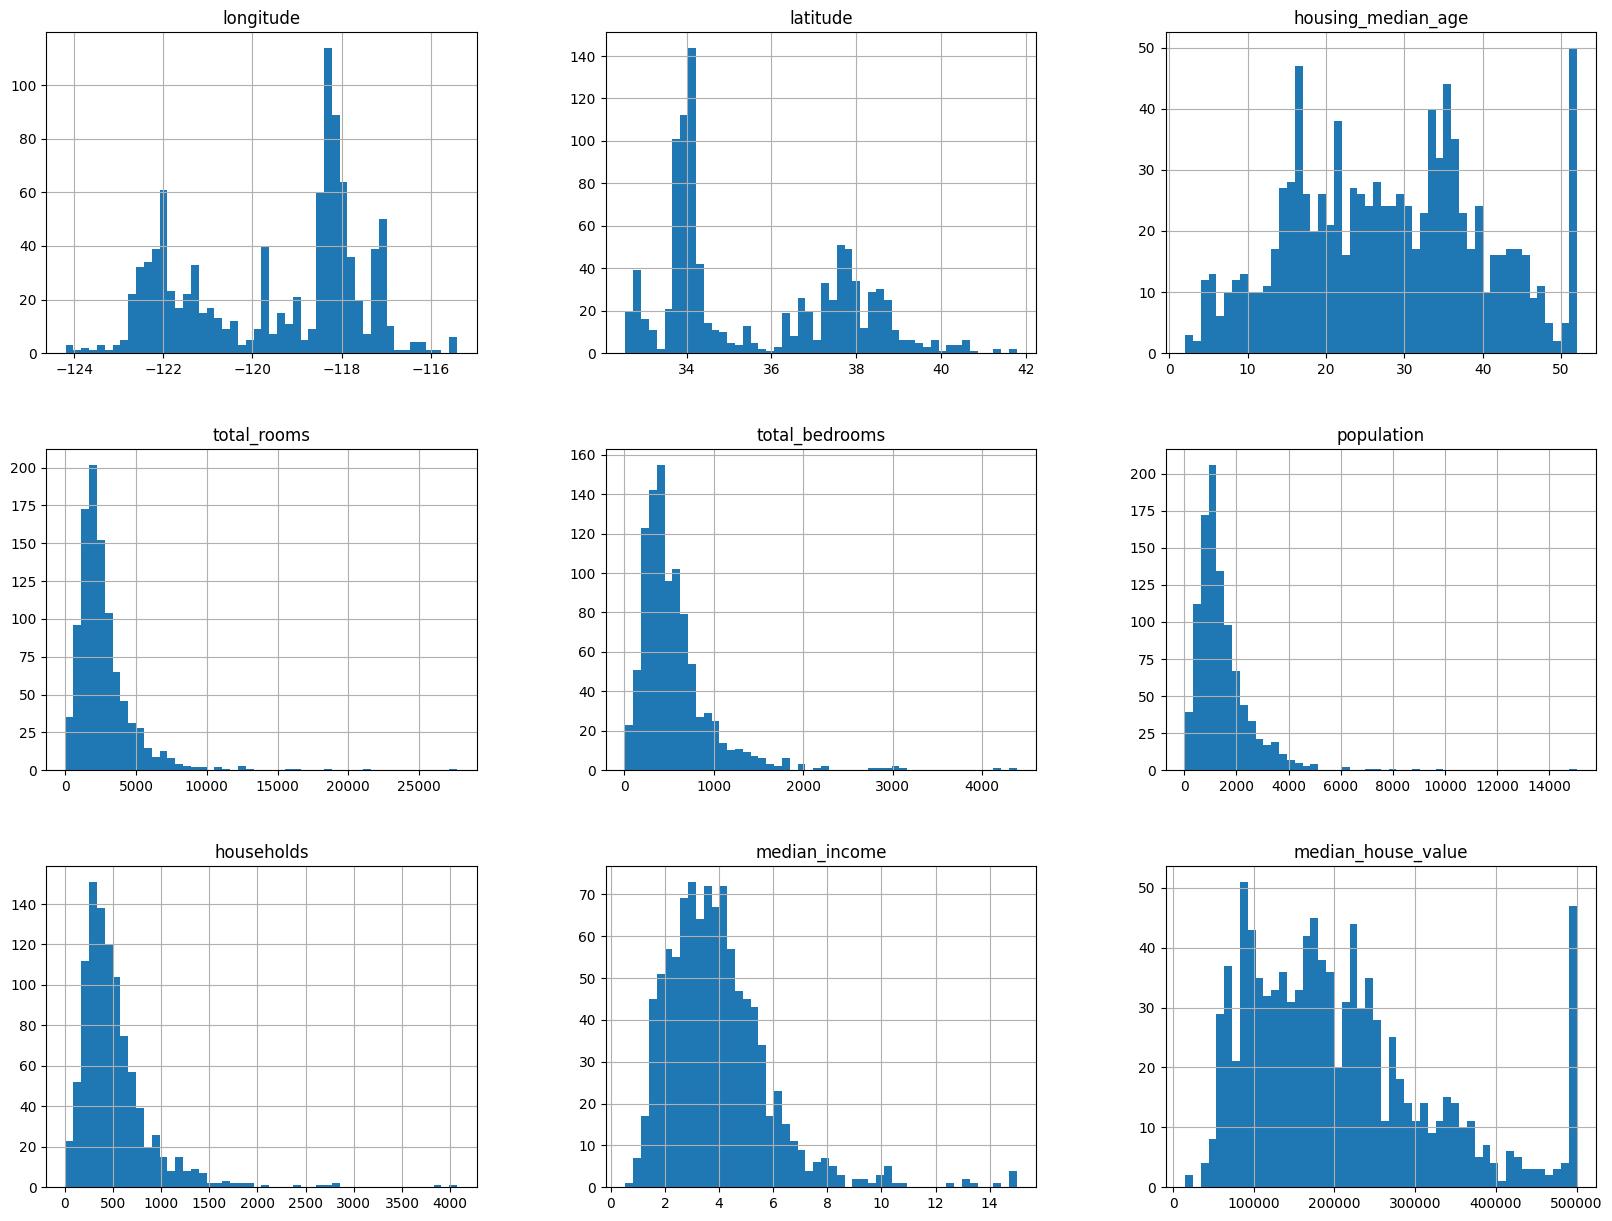

In [ ]:
# This will plot the histograms for additional information
histograms = testData
histograms.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

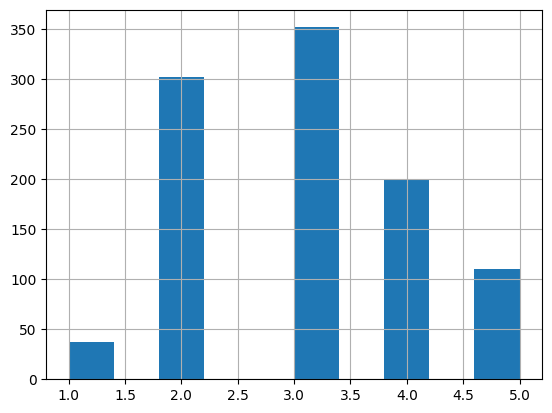

In [ ]:
# This will create new income categories based on the median income column
testData['income_cat'] = pd.cut(testData['median_income'],
                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                labels=[1, 2, 3, 4, 5])
testData['income_cat'].hist()

In [ ]:
display(testData.select_dtypes(include=np.number).describe())
display(testData.select_dtypes(exclude=np.number).describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1000.000000,1000.000000,1000.000000,1000.000000,988.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-119.534070,35.636270,27.739000,2728.934000,556.920040,1466.380000,515.120000,3.946411,207094.443000
std,1.949075,2.135451,12.275079,2163.668861,424.277156,1111.243247,382.001069,1.944623,114243.192645
min,-124.190000,32.560000,2.000000,19.000000,11.000000,34.000000,9.000000,0.536000,14999.000000
25%,-121.520000,33.910000,18.000000,1487.250000,302.750000,809.500000,288.750000,2.624200,118775.000000
50%,-118.535000,34.280000,28.000000,2206.500000,448.000000,1194.000000,426.500000,3.687500,184150.000000
75%,-118.067500,37.700000,36.000000,3258.500000,668.250000,1800.000000,625.250000,4.856800,261950.000000
max,-115.410000,41.780000,52.000000,27700.000000,4386.000000,15037.000000,4072.000000,15.000100,500001.000000


,ocean_proximity,income_cat
count,993,1000
unique,4,5
top,<1H OCEAN,3
freq,455,352


<Axes: xlabel='longitude', ylabel='latitude'>

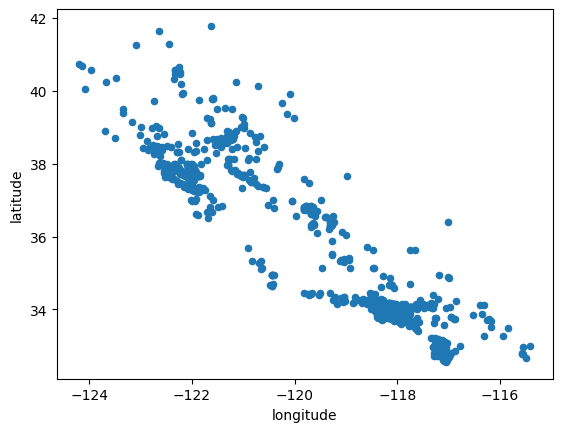

In [ ]:
# Now let's visualise the geographical data using both latitude and longitude values
testData.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

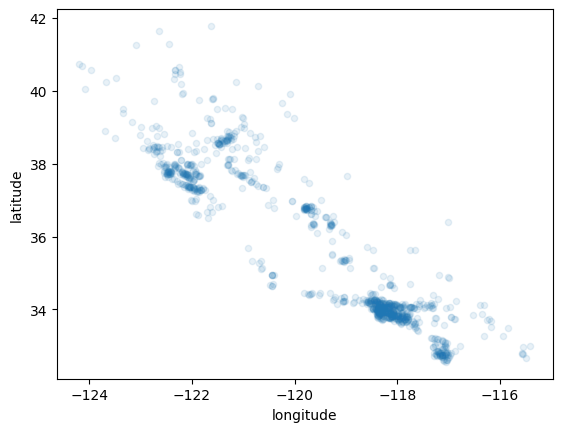

In [ ]:
# To get a better view of the data, since the above scatter plot looks like California state on the map
# let's set the alpha to 0.1 to visualise the high and low densities
testData.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

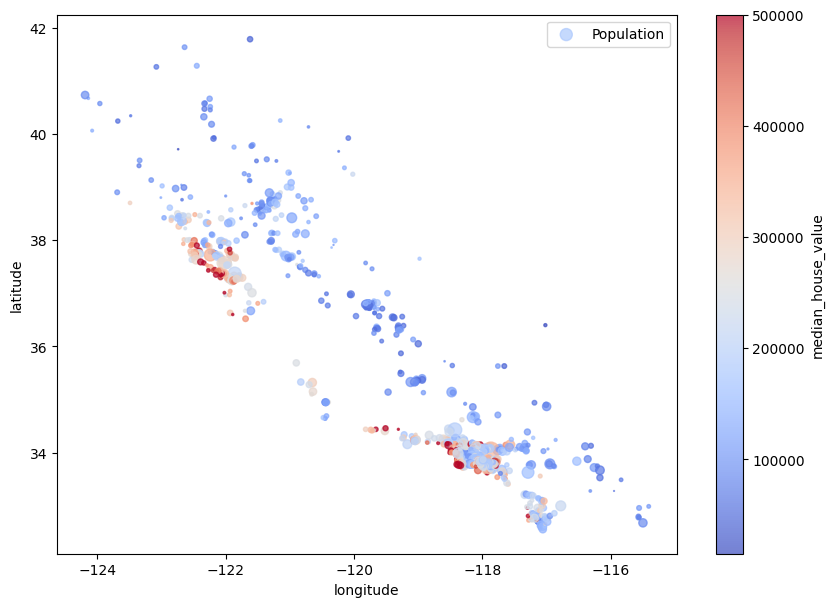

In [ ]:
# Now if we use the median house price, we can get a more complex view of the data and find additional patterns
testData.plot(kind="scatter", x="longitude", y="latitude", alpha=0.7,
              s=testData["population"]/100, label="Population", figsize=(10,7),
              c="median_house_value", cmap=plt.get_cmap("coolwarm"), colorbar=True,)
plt.legend()

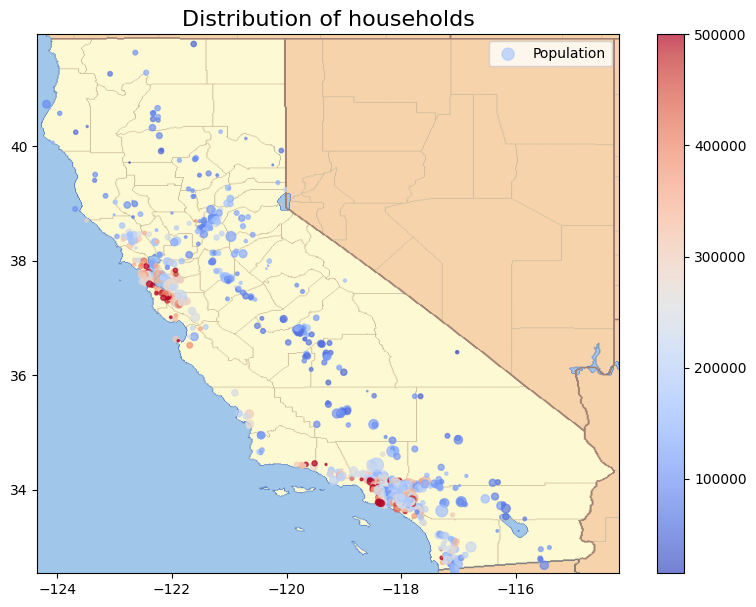

In [ ]:
# Now let's also add the actual state map of California overlayed with our plot from above
plt.figure(figsize=(10,7))
img=plt.imread('/content/california.png')
plt.imshow(img,zorder=0, extent=[-124.35, -114.2, 32.54, 41.95])
plt.scatter(x=testData['longitude'],y=testData['latitude'],alpha=0.7,s=testData['population']/100,c=testData['median_house_value'],
            cmap=plt.get_cmap("coolwarm"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

In [ ]:
# Let's see the correlation between the median house price and the rest of the features
corr_matrix = testData.drop(columns=['ocean_proximity']).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.673496
income_cat,0.624957
housing_median_age,0.097660
total_rooms,0.097261
households,0.036112
total_bedrooms,0.018476
population,-0.032074
longitude,-0.034237
latitude,-0.171362


<Axes: >

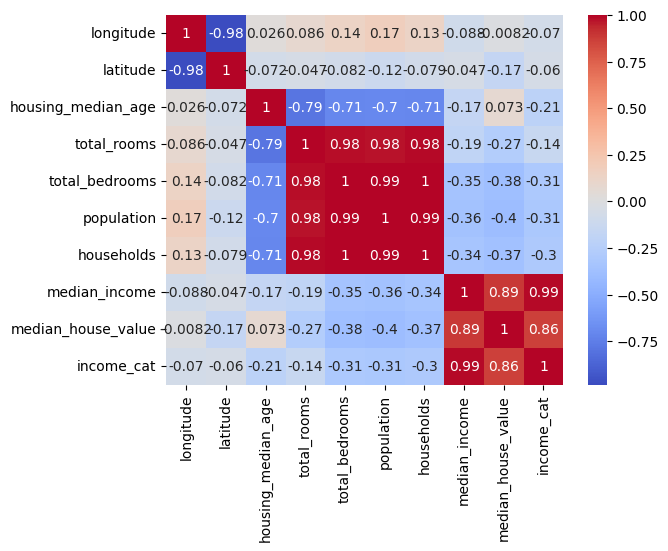

In [ ]:
# Now we can additionally plot a correlation heat map to further details
sns.heatmap(corr_matrix.corr(), cmap="coolwarm", annot=True)

In [ ]:
# Now after performing the above exploratory data analysis through visualisations
# let's combine the features with the column "ocean_proximity" with the numerical values
testData = pd.concat([
    testData.drop(['ocean_proximity', 'income_cat'], axis=1),  # Drop both columns
    pd.get_dummies(testData['ocean_proximity'], prefix='ocean_proximity', dtype=int),  # One-hot encode 'ocean_proximity'
    pd.get_dummies(testData['income_cat'], prefix='income_cat', dtype=int)  # One-hot encode 'income_cat'
], axis=1)

testData


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,income_cat_1,income_cat_2,income_cat_3,income_cat_4,income_cat_5
0,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,0,0,1,0,0,1,0,0,0
1,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,0,0,1,0,0,0,1,0,0
2,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,0,0,1,0,0,0,1,0,0
3,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,0,0,1,0,0,0,1,0,0
4,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-119.30,36.30,14,3023,469.0,1523,492,5.3602,118600,0,1,0,0,0,0,0,1,0
996,-121.70,38.65,22,1360,282.0,808,229,2.4167,225000,0,1,0,0,0,1,0,0,0
997,-121.92,38.57,10,1320,246.0,898,228,1.9327,193800,0,1,0,0,0,1,0,0,0
998,-122.00,38.83,26,272,49.0,194,52,3.4187,98400,0,1,0,0,0,0,1,0,0


In [ ]:
# This will enginner three new features such as "rooms_per_household", "bedrooms_per_room", and "population_per_household"
# for a more comples correlation between features
testData.loc[:, 'rooms_per_household'] = testData['total_rooms'] / testData['households']
testData.loc[:, 'bedrooms_per_room'] = testData['total_bedrooms'] / testData['total_rooms']
testData.loc[:, 'population_per_household'] = testData['population'] / testData['households']
testData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,...,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,income_cat_1,income_cat_2,income_cat_3,income_cat_4,income_cat_5,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,0,...,1,0,0,1,0,0,0,4.624535,0.247990,2.392193
1,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,0,...,1,0,0,0,1,0,0,5.428058,0.184559,2.598921
2,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,0,...,1,0,0,0,1,0,0,4.946429,0.182053,2.469388
3,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,0,...,1,0,0,0,1,0,0,5.437352,0.192609,2.895981
4,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,0,...,1,0,0,1,0,0,0,4.746269,0.227463,2.716418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-119.30,36.30,14,3023,469.0,1523,492,5.3602,118600,0,...,0,0,0,0,0,1,0,6.144309,0.155144,3.095528
996,-121.70,38.65,22,1360,282.0,808,229,2.4167,225000,0,...,0,0,0,1,0,0,0,5.938865,0.207353,3.528384
997,-121.92,38.57,10,1320,246.0,898,228,1.9327,193800,0,...,0,0,0,1,0,0,0,5.789474,0.186364,3.938596
998,-122.00,38.83,26,272,49.0,194,52,3.4187,98400,0,...,0,0,0,0,1,0,0,5.230769,0.180147,3.730769


In [ ]:
# This will save the new dataframe with the given features
testData = testData[['longitude',	'latitude',
                     'housing_median_age',	'total_rooms',
                     'total_bedrooms',	'population',
                     'households',	'median_income', 'rooms_per_household',
                     'bedrooms_per_room', 'population_per_household',
                     'ocean_proximity_<1H OCEAN',	'ocean_proximity_INLAND',
                     'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
                     'income_cat_1', 'income_cat_2', 'income_cat_3',
                     'income_cat_4', 'income_cat_5',
                     'median_house_value']]
testData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,...,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,income_cat_1,income_cat_2,income_cat_3,income_cat_4,income_cat_5,median_house_value
0,-122.12,37.70,17,2488,617.0,1287,538,2.9922,4.624535,0.247990,...,0,0,1,0,0,1,0,0,0,179900
1,-122.21,38.10,36,3018,557.0,1445,556,3.8029,5.428058,0.184559,...,0,0,1,0,0,0,1,0,0,129900
2,-122.22,38.11,43,1939,353.0,968,392,3.1848,4.946429,0.182053,...,0,0,1,0,0,0,1,0,0,112700
3,-122.20,37.78,52,2300,443.0,1225,423,3.5398,5.437352,0.192609,...,0,0,1,0,0,0,1,0,0,158400
4,-122.19,37.79,50,954,217.0,546,201,2.6667,4.746269,0.227463,...,0,0,1,0,0,1,0,0,0,172800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-119.30,36.30,14,3023,469.0,1523,492,5.3602,6.144309,0.155144,...,0,1,0,0,0,0,0,1,0,118600
996,-121.70,38.65,22,1360,282.0,808,229,2.4167,5.938865,0.207353,...,0,1,0,0,0,1,0,0,0,225000
997,-121.92,38.57,10,1320,246.0,898,228,1.9327,5.789474,0.186364,...,0,1,0,0,0,1,0,0,0,193800
998,-122.00,38.83,26,272,49.0,194,52,3.4187,5.230769,0.180147,...,0,1,0,0,0,0,1,0,0,98400


In [ ]:
# Let's see the correlation between the median house price and the rest of the final features
corr_matrix = testData.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.673496
income_cat_5,0.527635
ocean_proximity_<1H OCEAN,0.293385
income_cat_4,0.193599
rooms_per_household,0.169001
ocean_proximity_NEAR BAY,0.149749
ocean_proximity_NEAR OCEAN,0.146354
housing_median_age,0.097660
total_rooms,0.097261


### **2.3. Removing Outliers**

In [ ]:
# First let's check if there are any missing values
display(testData.select_dtypes(include=np.number).describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,...,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,income_cat_1,income_cat_2,income_cat_3,income_cat_4,income_cat_5,median_house_value
count,1000.000000,1000.000000,1000.000000,1000.000000,988.000000,1000.000000,1000.000000,1000.000000,1000.000000,988.000000,...,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-119.534070,35.636270,27.739000,2728.934000,556.920040,1466.380000,515.120000,3.946411,5.442951,0.211934,...,0.45500,0.333000,0.091000,0.11400,0.037000,0.302000,0.352000,0.199000,0.110000,207094.443000
std,1.949075,2.135451,12.275079,2163.668861,424.277156,1111.243247,382.001069,1.944623,1.810899,0.062206,...,0.49822,0.471522,0.287753,0.31797,0.188856,0.459355,0.477833,0.399448,0.313046,114243.192645
min,-124.190000,32.560000,2.000000,19.000000,11.000000,34.000000,9.000000,0.536000,1.625514,0.106785,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,-121.520000,33.910000,18.000000,1487.250000,302.750000,809.500000,288.750000,2.624200,4.543975,0.175436,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,118775.000000
50%,-118.535000,34.280000,28.000000,2206.500000,448.000000,1194.000000,426.500000,3.687500,5.306809,0.201210,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,184150.000000
75%,-118.067500,37.700000,36.000000,3258.500000,668.250000,1800.000000,625.250000,4.856800,6.063973,0.235281,...,1.00000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,261950.000000
max,-115.410000,41.780000,52.000000,27700.000000,4386.000000,15037.000000,4072.000000,15.000100,31.062500,1.000000,...,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000


In [ ]:
print(testData.isnull().sum())

longitude                      0
latitude                       0
housing_median_age             0
total_rooms                    0
total_bedrooms                12
population                     0
households                     0
median_income                  0
rooms_per_household            0
bedrooms_per_room             12
population_per_household       0
ocean_proximity_<1H OCEAN      0
ocean_proximity_INLAND         0
ocean_proximity_NEAR BAY       0
ocean_proximity_NEAR OCEAN     0
income_cat_1                   0
income_cat_2                   0
income_cat_3                   0
income_cat_4                   0
income_cat_5                   0
median_house_value             0
dtype: int64


In [ ]:
# This will replace the missing values from both "total_bedrooms", and "bedrooms_per_room" with their mean value
testData.fillna({'total_bedrooms': testData['total_bedrooms'].mean()}, inplace=True)
testData.fillna({'bedrooms_per_room': testData['bedrooms_per_room'].mean()}, inplace=True)
print(testData.isnull().sum())
len(testData)

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
rooms_per_household           0
bedrooms_per_room             0
population_per_household      0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
income_cat_1                  0
income_cat_2                  0
income_cat_3                  0
income_cat_4                  0
income_cat_5                  0
median_house_value            0
dtype: int64


1000

In [ ]:
print(testData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   1000 non-null   float64
 1   latitude                    1000 non-null   float64
 2   housing_median_age          1000 non-null   int64  
 3   total_rooms                 1000 non-null   int64  
 4   total_bedrooms              1000 non-null   float64
 5   population                  1000 non-null   int64  
 6   households                  1000 non-null   int64  
 7   median_income               1000 non-null   float64
 8   rooms_per_household         1000 non-null   float64
 9   bedrooms_per_room           1000 non-null   float64
 10  population_per_household    1000 non-null   float64
 11  ocean_proximity_<1H OCEAN   1000 non-null   int64  
 12  ocean_proximity_INLAND      1000 non-null   int64  
 13  ocean_proximity_NEAR BAY    1000 n

### **2.4. Data Splitting**

In [ ]:
# Splitting the dataset before shuffling and keeping the last 190 datapoints for the test set
train_set, val_set, test_set = testData[:620], testData[620:810], testData[810:]
len(train_set), len(val_set), len(test_set)

(620, 190, 190)

In [ ]:
# This will only shuffle the training set
train_set_shuffled = train_set.sample(n=len(train_set), random_state=42)

In [ ]:
# This verifies if the training set is shuffled
train_set_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,...,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,income_cat_1,income_cat_2,income_cat_3,income_cat_4,income_cat_5,median_house_value
49,-121.87,39.75,22,1707,296.0,822,297,3.6625,5.747475,0.173404,...,0,1,0,0,0,0,1,0,0,126600
584,-121.18,38.75,16,2807,459.0,1201,429,4.7941,6.543124,0.163520,...,0,1,0,0,0,0,0,1,0,247600
82,-122.28,37.91,38,2501,348.0,805,329,6.5576,7.601824,0.139144,...,0,0,1,0,0,0,0,0,1,358500
305,-117.74,34.07,52,1868,316.0,947,328,4.2415,5.695122,0.169165,...,0,1,0,0,0,0,1,0,0,140100
109,-119.56,36.71,37,1609,374.0,1173,344,2.1810,4.677326,0.232443,...,0,1,0,0,0,1,0,0,0,59900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-121.93,37.76,5,2255,269.0,876,258,10.3345,8.740310,0.119290,...,1,0,0,0,0,0,0,0,1,461400
106,-119.69,36.81,13,1524,366.0,994,370,2.5446,4.118919,0.240157,...,0,1,0,0,0,1,0,0,0,93800
270,-118.43,34.03,45,1740,311.0,788,306,5.2099,5.686275,0.178736,...,1,0,0,0,0,0,0,1,0,373600
435,-118.48,34.04,40,1395,285.0,610,262,3.9659,5.324427,0.204301,...,1,0,0,0,0,0,1,0,0,500001


### **2.5. Feature Scaling**

In [ ]:
# This will convert all three sets into arrays using .to_numpy method
X_train, y_train = train_set.to_numpy()[:, :-1], train_set.to_numpy()[:, -1]
X_val, y_val = val_set.to_numpy()[:, :-1], val_set.to_numpy()[:, -1]
X_test, y_test = test_set.to_numpy()[:, :-1], test_set.to_numpy()[:, -1]
# This will check if the sets were transformed
X_train.shape, y_train.shape, X_val.shape, y_val.shape,  X_test.shape, y_test.shape

((620, 20), (620,), (190, 20), (190,), (190, 20), (190,))

In [ ]:
# Using Standard Scaler to scale the training set adding only the first 11 columns
# except the encoded categorical columns
scaler = StandardScaler().fit(X_train[:, :11])

def preprocessor(X):
  A = np.copy(X)
  A[:, :11] = scaler.transform(A[:, :11])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

### **2.6. Pre-Processing Summary**

In [ ]:
# This will check if the sets shape are correct
X_train.shape, X_val.shape, X_test.shape

((620, 20), (190, 20), (190, 20))

In [ ]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.699526,1.250677,-1.001812,-0.113781,0.099973,-0.197270,0.019846,-0.481004,-0.412110,0.548692,-0.598051,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.751979,1.459549,0.589309,0.110847,-0.030347,-0.064833,0.063028,-0.060154,0.064231,-0.524558,-0.392327,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.757808,1.464771,1.175512,-0.346462,-0.473435,-0.464658,-0.330411,-0.381021,-0.221287,-0.566971,-0.521232,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.746151,1.292451,1.929201,-0.193461,-0.277955,-0.249239,-0.256041,-0.196734,0.069741,-0.388363,-0.096709,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.740323,1.297673,1.761714,-0.763932,-0.768827,-0.818382,-0.788624,-0.649977,-0.339945,0.201375,-0.275401,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


<Axes: >

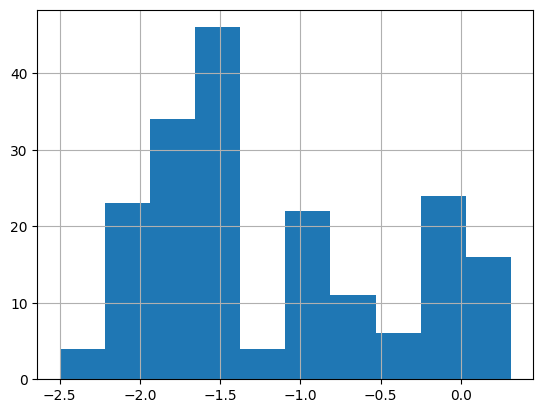

In [ ]:
pd.DataFrame(X_test)[0].hist()

## **3. Machine Learning Models**

### **3.1. Linear Regression**

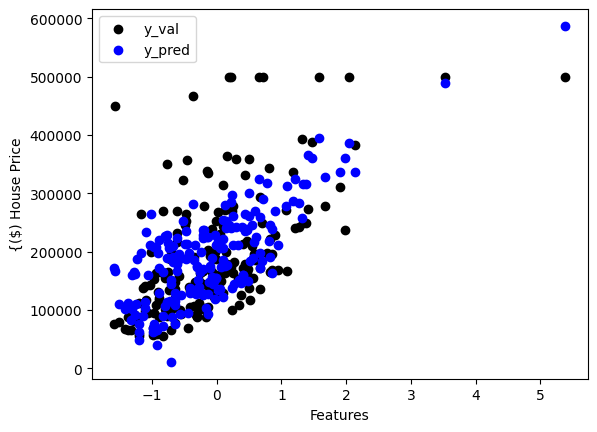

Train - MSE: 4145957752.6932 RMSE: 64389.1121 R2 score: 66.5289
Validation - MSE: 5212135141.7900 RMSE: 72195.1185 R2 score: 53.5764


In [ ]:
# Create linear regression model
lrm = sklearn.linear_model.Ridge()

# Train the model using the training sets
lrm.fit(X_train, y_train)

# # We can obtain out model coefficients from the model lrm we have trained
# print('theta_0:',lrm.intercept_)
# print('theta_1:',lrm.coef_)

# We can make a prediction with the training data
y_pred_train = lrm.predict(X_train)
# Remember the predictions with the new data give a better indiction of the true model performance.
# Make predictions using the validation set
y_pred = lrm.predict(X_val)

# I decided that for visualisation i wanted to use median income.
X_disp = X_val[:,7] # We have to choose a single column of the feature matrix so we can plot a 2D scatter plot.

# Plot outputs
plt.scatter(X_disp, y_val,  color='black', label='y_val') # Observed y values
plt.scatter(X_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('Features')
plt.ylabel('{($) House Price')
plt.legend()
plt.show()

# Now we are training the metrics
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Now we are validating first the the metrics
mse_val = mean_squared_error(y_val, y_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_pred)

# The mean squared error loss, root mean squared error loss, and R2 for the validation and train data
print('Train - MSE: {:.4f} RMSE: {:.4f} R2 score: {:.4f}'.format(mse_train, rmse_train, ((r2_train)*100)))
print('Validation - MSE: {:.4f} RMSE: {:.4f} R2 score: {:.4f}'.format(mse_val, rmse_val, ((r2_val)*100)))

### **3.2. Decision Tree**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.754e+09, tolerance: 7.680e+08
  model = cd_fast.enet_coordinate_descent(


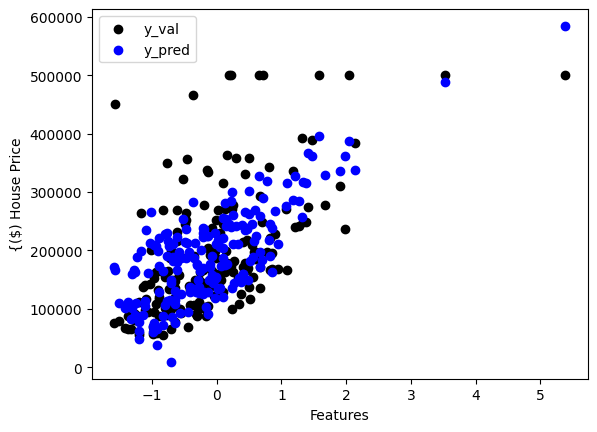

Train - MSE: 4142930889.4477 RMSE: 64365.6033 R2 score: 0.6655
Validation - MSE: 5230720216.5710 RMSE: 72323.7182 R2 score: 0.5341


In [ ]:
# Create the dtm model
dtm = Lasso()

# Train the model using the training sets
dtm.fit(X_train, y_train)

# We can make a prediction with the training data
y_pred_train = dtm.predict(X_train)
# Remember the predictions with the new data give a better indiction of the true model performance.
# Make predictions using the validation set
y_pred = dtm.predict(X_val)

# I decided that for visualisation i wanted to use median income.
X_disp = X_val[:,7] # We have to choose a single column of the feature matrix so we can plot a 2D scatter plot.

# Plot outputs
plt.scatter(X_disp, y_val,  color='black', label='y_val') # Observed y values
plt.scatter(X_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('Features')
plt.ylabel('{($) House Price')
plt.legend()
plt.show()

# Now we are training the metrics
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Now we are validating first the the metrics
mse_val = mean_squared_error(y_val, y_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_pred)

# The mean squared error loss, root mean squared error loss, and R2 for the validation and train data
print('Train - MSE: {:.4f} RMSE: {:.4f} R2 score: {:.4f}'.format(mse_train, rmse_train, r2_train))
print('Validation - MSE: {:.4f} RMSE: {:.4f} R2 score: {:.4f}'.format(mse_val, rmse_val, r2_val))

### **3.3 K-Nearest Neighbor**

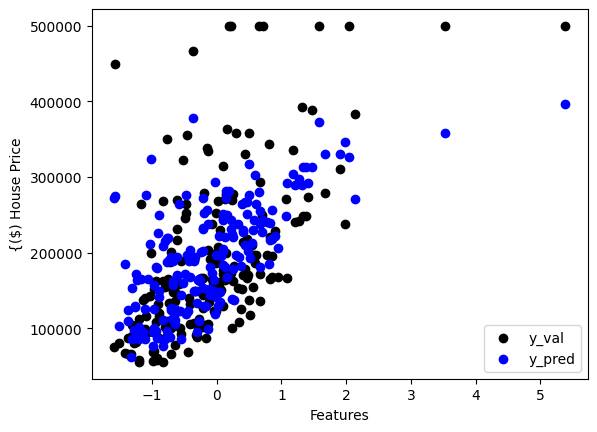

Train - MSE: 2729292966.6762 RMSE: 52242.6355 R2 score: 0.7797
Validation - MSE: 6609690371.5331 RMSE: 81300.0023 R2 score: 0.4113


In [ ]:
# Create knn model
knn = sklearn.neighbors.KNeighborsRegressor()

# Train the model using the training sets
knn.fit(X_train, y_train)

# We can make a prediction with the training data
y_pred_train = knn.predict(X_train)
# Remember the predictions with the new data give a better indiction of the true model performance.
# Make predictions using the validation set
y_pred = knn.predict(X_val)

# I decided that for visualisation i wanted to use median income.
X_disp = X_val[:,7] # We have to choose a single column of the feature matrix so we can plot a 2D scatter plot.

# Plot outputs
plt.scatter(X_disp, y_val,  color='black', label='y_val') # Observed y values
plt.scatter(X_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('Features')
plt.ylabel('{($) House Price')
plt.legend()
plt.show()

# Now we are training the metrics
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Now we are validating first the the metrics
mse_val = mean_squared_error(y_val, y_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_pred)

# The mean squared error loss, root mean squared error loss, and R2 for the validation and train data
print('Train - MSE: {:.4f} RMSE: {:.4f} R2 score: {:.4f}'.format(mse_train, rmse_train, r2_train))
print('Validation - MSE: {:.4f} RMSE: {:.4f} R2 score: {:.4f}'.format(mse_val, rmse_val, r2_val))

### **3.4. Random Forest**

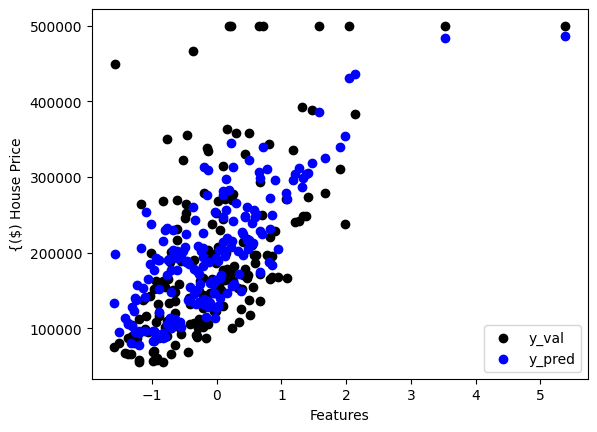

Train - MSE: 467811618.1028 RMSE: 21628.9532 R2 score: 0.9622
Validation - MSE: 4683885137.0058 RMSE: 68438.9154 R2 score: 0.5828


In [ ]:
# Create rfm model
rfm = sklearn.ensemble.RandomForestRegressor()

# Train the model using the training sets
rfm.fit(X_train, y_train)

# We can make a prediction with the training data
y_pred_train = rfm.predict(X_train)
# Remember the predictions with the new data give a better indiction of the true model performance.
# Make predictions using the validation set
y_pred = rfm.predict(X_val)

# I decided that for visualisation i wanted to use median income.
X_disp = X_val[:,7] # We have to choose a single column of the feature matrix so we can plot a 2D scatter plot.

# Plot outputs
plt.scatter(X_disp, y_val,  color='black', label='y_val') # Observed y values
plt.scatter(X_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('Features')
plt.ylabel('{($) House Price')
plt.legend()
plt.show()

# Now we are training the metrics
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Now we are validating first the the metrics
mse_val = mean_squared_error(y_val, y_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_pred)

# The mean squared error loss, root mean squared error loss, and R2 for the validation and train data
print('Train - MSE: {:.4f} RMSE: {:.4f} R2 score: {:.4f}'.format(mse_train, rmse_train, r2_train))
print('Validation - MSE: {:.4f} RMSE: {:.4f} R2 score: {:.4f}'.format(mse_val, rmse_val, r2_val))

### **3.5. Gradient Boosting**

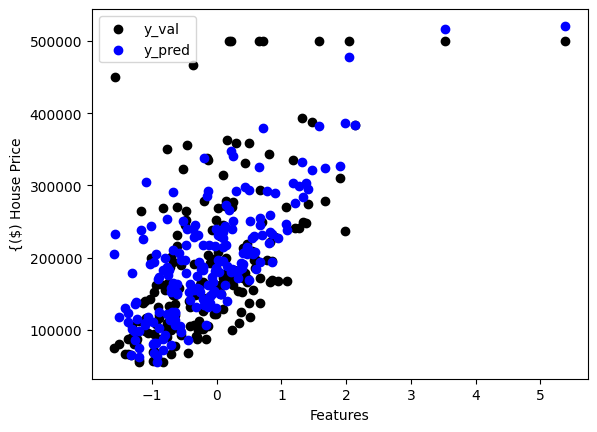

Train - MSE: 928772204.5285 RMSE: 30475.7642 R2 score: 0.9250
Validation - MSE: 4294264414.9241 RMSE: 65530.6372 R2 score: 0.6175


In [ ]:
# Create gbm model
gbm = sklearn.ensemble.GradientBoostingRegressor()

# Train the model using the training sets
gbm.fit(X_train, y_train)

# We can make a prediction with the training data
y_pred_train = gbm.predict(X_train)
# Remember the predictions with the new data give a better indiction of the true model performance.
# Make predictions using the validation set
y_pred = gbm.predict(X_val)

# I decided that for visualisation i wanted to use median income.
X_disp = X_val[:,7] # We have to choose a single column of the feature matrix so we can plot a 2D scatter plot.

# Plot outputs
plt.scatter(X_disp, y_val,  color='black', label='y_val') # Observed y values
plt.scatter(X_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('Features')
plt.ylabel('{($) House Price')
plt.legend()
plt.show()

# Now we are training the metrics
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Now we are validating first the the metrics
mse_val = mean_squared_error(y_val, y_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_pred)

# The mean squared error loss, root mean squared error loss, and R2 for the validation and train data
print('Train - MSE: {:.4f} RMSE: {:.4f} R2 score: {:.4f}'.format(mse_train, rmse_train, r2_train))
print('Validation - MSE: {:.4f} RMSE: {:.4f} R2 score: {:.4f}'.format(mse_val, rmse_val, r2_val))

In [ ]:
# This will create a dictionary list of our models
models = {
    "GBM": gbm,    # Gradient Boosting Machine
    "RFM": rfm,    # Random Forest Regressor
    "KNN": knn,    # K-Nearest Neighbors
    "DTM": dtm,    # Decision Tree Regressor
    "LRM": lrm     # Linear Regression Model
}

# LaTeX Table Header
latex_table = """
\\begin{table}[ht]
\\centering
\\begin{tabular}{|l|c|c|c|}
\\hline
Model & MSE & RMSE & R2 Score \\\\
\\hline
"""

# Loop through each model, fit it, predict, and compute the metrics
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Compute MSE, RMSE, and R²
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = (r2_score(y_test, y_pred)*100)

    # Append model results to the LaTeX table
    latex_table += f"{model_name} & {mse:.4f} & {rmse:.4f} & {r2:.4f} \\\\ \n"

# LaTeX Table Footer
latex_table += """
\\hline
\\end{tabular}
\\caption{Model Performance Metrics}
\\end{table}
"""

# Print the LaTeX table
print(latex_table)


\begin{table}[ht]
\centering
\begin{tabular}{|l|c|c|c|}
\hline
Model & MSE & RMSE & R2 Score \\
\hline
GBM & 6062630686.6487 & 77862.8967 & 63.1244 \\ 
RFM & 5088908550.0095 & 71336.5863 & 69.0470 \\ 
KNN & 6741088512.3897 & 82104.1321 & 58.9978 \\ 
DTM & 4889020114.1296 & 69921.5283 & 70.2628 \\ 
LRM & 4872855566.8164 & 69805.8419 & 70.3612 \\ 

\hline
\end{tabular}
\caption{Model Performance Metrics}
\end{table}



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.754e+09, tolerance: 7.680e+08
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# This sets the grid for finding the best hyperparameters
param_grid = {
    "LRM": {},  # No hyperparameters for Linear Regression
    "GBM": {'learning_rate': np.arange(0.01, 0.2, 0.01),
            'n_estimators': [10, 50, 100],
            'max_depth': [3, 5, 7, 9]},
    "RFM": {"n_estimators": [10, 50, 100, 200],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features": [2, 3],
            "bootstrap": [True]},
    "KNN": {"n_neighbors": [3, 5, 10], "weights": ["uniform", "distance"]},
    "DTM": {}
}

In [ ]:
# This will create a dictionary with our models
models = {
    "GBM": gbm,    # Gradient Boosting Machine
    "RFM": rfm,    # Random Forest Regressor
    "KNN": knn,    # K-Nearest Neighbors
    "DTM": dtm,    # Decision Tree Regressor
    "LRM": lrm     # Linear Regression Model
}

In [ ]:
# This will only save the best models
best_models = {}
for name, model in models.items():
    print(f"Optimizing {name}...")
    if param_grid[name]:  # We only use GridSearchCV if there are hyperparameters to tune
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
    else:
        best_models[name] = model  # For Linear Regression there wasn't any fine tuning needed

Optimizing GBM...
Best parameters for GBM: {'learning_rate': 0.18000000000000002, 'max_depth': 3, 'n_estimators': 50}
Optimizing RFM...
Best parameters for RFM: {'bootstrap': True, 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Optimizing KNN...
Best parameters for KNN: {'n_neighbors': 10, 'weights': 'distance'}
Optimizing DTM...
Optimizing LRM...


In [ ]:
# This will evaluate models
results = []
for name, model in best_models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Compute metrics
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_pred_train)

    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = (r2_score(y_test, y_pred_test)*100)

    results.append([name, mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test])

# Convert to DataFrame
df_results = pd.DataFrame(results, columns=["Model", "MSE (Train)", "RMSE (Train)", "R2 (Train)", "MSE (Test)", "RMSE (Test)", "R2 (Test)"])

# Print results
print(df_results)

  Model   MSE (Train)  RMSE (Train)  R2 (Train)    MSE (Test)   RMSE (Test)  \
0   GBM  6.621723e+08  25732.707934    0.946542  5.952350e+09  77151.473015   
1   RFM  1.177298e+09  34311.773168    0.904955  6.067805e+09  77896.115582   
2   KNN  1.052172e-04      0.010258    1.000000  7.047712e+09  83950.654547   
3   DTM  4.900526e+09  70003.760537    0.604372  6.931719e+09  83256.943665   
4   LRM  4.142928e+09  64365.581000    0.665534  4.890146e+09  69929.577089   

   R2 (Test)  
0  63.795214  
1  63.092966  
2  57.132741  
3  57.838266  
4  70.256002  


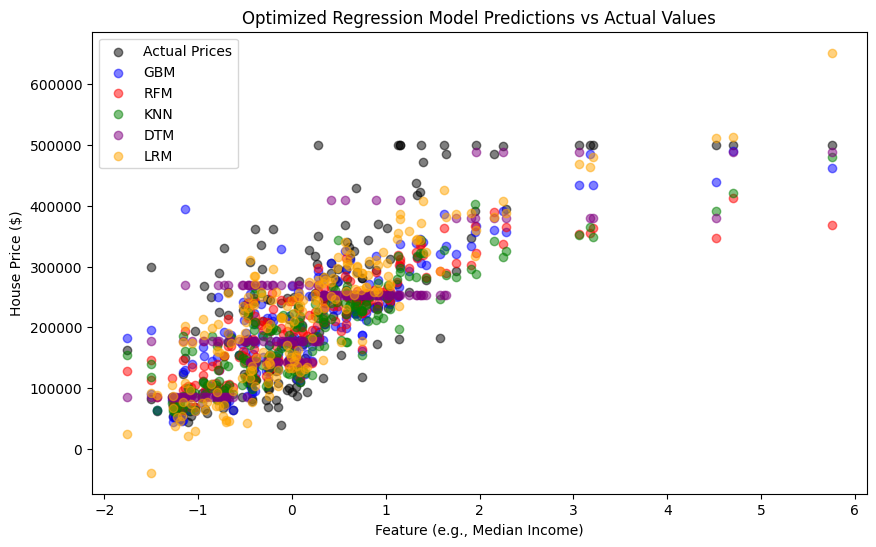

In [ ]:
X_disp = X_test[:, 7]  # Feature for visualization

plt.figure(figsize=(10, 6))
plt.scatter(X_disp, y_test, color='black', label='Actual Prices', alpha=0.5)

colors = ["blue", "red", "green", "purple", "orange"]
for (name, model), color in zip(best_models.items(), colors):
    y_pred = model.predict(X_test)
    plt.scatter(X_disp, y_pred, color=color, label=name, alpha=0.5)

plt.xlabel("Feature (e.g., Median Income)")
plt.ylabel("House Price ($)")
plt.title("Optimized Regression Model Predictions vs Actual Values")
plt.legend()
plt.show()

## **4. Deep Neural Network Model for Regression**

In [ ]:
nnData = testData[['longitude',	'latitude',
                     'housing_median_age',	'total_rooms',
                     'total_bedrooms',	'population',
                     'households',	'median_income', 'rooms_per_household',
                     'bedrooms_per_room', 'population_per_household',
                     'ocean_proximity_<1H OCEAN',	'ocean_proximity_INLAND',
                     'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
                     'income_cat_1', 'income_cat_2', 'income_cat_3',
                     'income_cat_4', 'income_cat_5',
                     'median_house_value']]
nnData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,...,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,income_cat_1,income_cat_2,income_cat_3,income_cat_4,income_cat_5,median_house_value
0,-122.12,37.70,17,2488,617.0,1287,538,2.9922,4.624535,0.247990,...,0,0,1,0,0,1,0,0,0,179900
1,-122.21,38.10,36,3018,557.0,1445,556,3.8029,5.428058,0.184559,...,0,0,1,0,0,0,1,0,0,129900
2,-122.22,38.11,43,1939,353.0,968,392,3.1848,4.946429,0.182053,...,0,0,1,0,0,0,1,0,0,112700
3,-122.20,37.78,52,2300,443.0,1225,423,3.5398,5.437352,0.192609,...,0,0,1,0,0,0,1,0,0,158400
4,-122.19,37.79,50,954,217.0,546,201,2.6667,4.746269,0.227463,...,0,0,1,0,0,1,0,0,0,172800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-119.30,36.30,14,3023,469.0,1523,492,5.3602,6.144309,0.155144,...,0,1,0,0,0,0,0,1,0,118600
996,-121.70,38.65,22,1360,282.0,808,229,2.4167,5.938865,0.207353,...,0,1,0,0,0,1,0,0,0,225000
997,-121.92,38.57,10,1320,246.0,898,228,1.9327,5.789474,0.186364,...,0,1,0,0,0,1,0,0,0,193800
998,-122.00,38.83,26,272,49.0,194,52,3.4187,5.230769,0.180147,...,0,1,0,0,0,0,1,0,0,98400


In [ ]:
# First let's check if there are any missing values
display(nnData.select_dtypes(include=np.number).describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,...,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,income_cat_1,income_cat_2,income_cat_3,income_cat_4,income_cat_5,median_house_value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-119.534070,35.636270,27.739000,2728.934000,556.920040,1466.380000,515.120000,3.946411,5.442951,0.211934,...,0.45500,0.333000,0.091000,0.11400,0.037000,0.302000,0.352000,0.199000,0.110000,207094.443000
std,1.949075,2.135451,12.275079,2163.668861,421.721246,1111.243247,382.001069,1.944623,1.810899,0.061832,...,0.49822,0.471522,0.287753,0.31797,0.188856,0.459355,0.477833,0.399448,0.313046,114243.192645
min,-124.190000,32.560000,2.000000,19.000000,11.000000,34.000000,9.000000,0.536000,1.625514,0.106785,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,-121.520000,33.910000,18.000000,1487.250000,307.500000,809.500000,288.750000,2.624200,4.543975,0.175582,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,118775.000000
50%,-118.535000,34.280000,28.000000,2206.500000,454.000000,1194.000000,426.500000,3.687500,5.306809,0.201627,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,184150.000000
75%,-118.067500,37.700000,36.000000,3258.500000,665.500000,1800.000000,625.250000,4.856800,6.063973,0.234213,...,1.00000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,261950.000000
max,-115.410000,41.780000,52.000000,27700.000000,4386.000000,15037.000000,4072.000000,15.000100,31.062500,1.000000,...,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000


In [ ]:
X_pd = nnData[['longitude',	'latitude',
                     'housing_median_age',	'total_rooms',
                     'total_bedrooms',	'population',
                     'households',	'median_income', 'rooms_per_household',
                     'bedrooms_per_room', 'population_per_household',
                     'ocean_proximity_<1H OCEAN',	'ocean_proximity_INLAND',
                     'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
                     'income_cat_1', 'income_cat_2', 'income_cat_3',
                     'income_cat_4', 'income_cat_5']]
y_pd = nnData[['median_house_value']]

In [ ]:
# prepare NumPy ndarrays
X_raw = X_pd.to_numpy()
Y = y_pd.to_numpy()

# Split the data into training/test data
# We have 1000 pairs of a feature and target, we only use the last 190 datapoints for the test, not for training and validation.
# `shuffle=True` for non-time series case. You should set `shuffle=False` to avoid future data being contaminated in the training data.
X_nontest_raw, X_test_raw, Y_nontest, Y_test = train_test_split(X_raw, Y, test_size=0.19, shuffle=True, random_state=42)
X_train_raw, X_valid_raw, Y_train, Y_valid = train_test_split(X_nontest_raw, Y_nontest, test_size=0.19, shuffle=True, random_state=42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_valid = scaler.transform(X_valid_raw)
X_test = scaler.transform(X_test_raw)

In [ ]:
print('The shape of `X_train`:', X_train.shape)
print('The shape of `X_valid`:', X_valid.shape)
print('The shape of `X_test`:', X_test.shape)

The shape of `X_train`: (656, 20)
The shape of `X_valid`: (154, 20)
The shape of `X_test`: (190, 20)


In [ ]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.238164,-1.361703,1.015380,-0.584953,-0.315369,-0.609771,-0.311372,-0.894854,-0.949161,1.144599,-0.786247,-0.915169,-0.698232,-0.331637,2.826004,-0.207184,1.509967,-0.747124,-0.480384,-0.348378
1,-1.626810,1.927921,-0.988499,-1.155333,-1.120063,-1.270311,-1.232880,-1.169739,0.702452,1.139672,-0.610996,-0.915169,1.432188,-0.331637,-0.353856,-0.207184,1.509967,-0.747124,-0.480384,-0.348378
2,-0.724496,1.317329,-0.988499,-0.453868,-0.544291,3.186955,-0.590147,0.213957,0.360189,-0.456806,12.228637,-0.915169,1.432188,-0.331637,-0.353856,-0.207184,-0.662266,1.338465,-0.480384,-0.348378
3,0.911903,-0.831577,-1.549585,0.997924,0.466202,0.574234,0.463005,1.444997,0.840820,-0.884261,0.051016,1.092694,-0.698232,-0.331637,-0.353856,-0.207184,-0.662266,-0.747124,-0.480384,2.870442
4,-1.213887,1.004933,-1.870206,-0.215662,-0.666845,-0.542613,-0.665004,3.372650,1.823085,-1.472281,0.384582,1.092694,-0.698232,-0.331637,-0.353856,-0.207184,-0.662266,-0.747124,-0.480384,2.870442


Model: "Linear_Regression"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 512)                 │          10,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,345 (724.00 KB)

 Trainable params: 185,345 (724.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_28']
Received: inputs=Tensor(shape=(None, 20))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 55416479744.0000 - val_loss: 59522023424.0000
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 55414358016.0000 - val_loss: 59511902208.0000
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 55404269568.0000 - val_loss: 59481407488.0000
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 55373746176.0000 - val_loss: 59406249984.0000
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 55298408448.0000 - val_loss: 59244789760.0000
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 55136452608.0000 - val_loss: 58930405376.0000
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 54820974592.0000 - val_loss: 58358611968.0000
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 54247337984.0000 - val_loss: 57375838208.0000
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 53262073856.0000 - val_loss: 55766880256.0000
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 51652210688.000

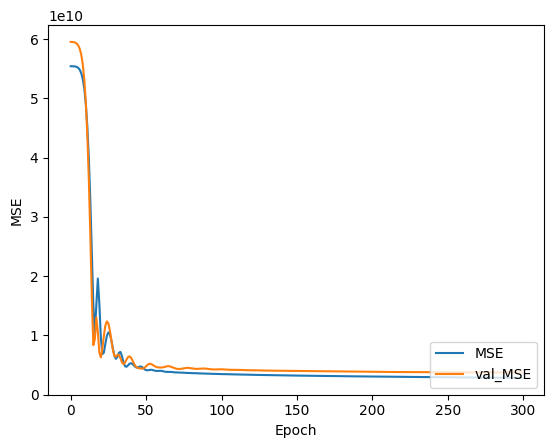

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3558468864.0000 
The mean squared error on the test data: 3627126528.0
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_28']
Received: inputs=Tensor(shape=(32, 20))
  warnings.warn(msg)


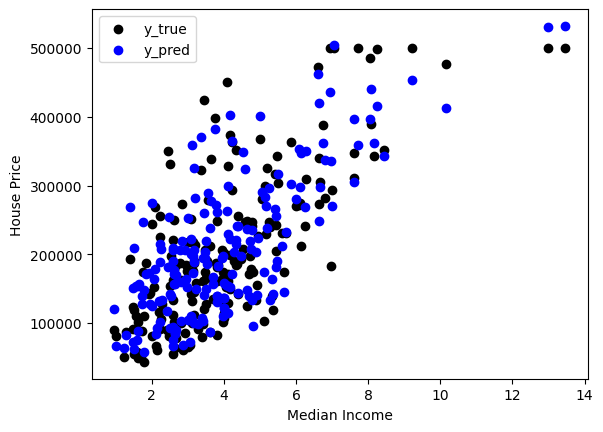

Train - MSE: 2802111744.0000 RMSE: 52934.9766 R2 score: 0.7854
Test - MSE: 3627126784.0000 RMSE: 60225.6323 R2 score: 70.6029


In [ ]:
input = Input(shape=X_train.shape[1:])

dense_layer = Dense(units=512, activation=relu)
dense_layer1 = Dense(units=256, activation=relu)
dense_layer2 = Dense(units=128, activation=relu)
dense_layer3 = Dense(units=64, activation=relu)
dense_layer4 = Dense(units=32, activation=relu)
dense_layer5 = Dense(units=1, activation=linear)


# Define the "virtual" output
output = dense_layer(input)
output = dense_layer1(output)
output = dense_layer2(output)
output = dense_layer3(output)
output = dense_layer4(output)
output = dense_layer5(output)


# Define the neural network model.
model = Model(inputs=[input], outputs=[output], name='Linear_Regression')
model.summary()

# Compile the model by specifying the optimization algorithm and the loss function.
opt = Adam(learning_rate=0.01)
mse = MeanSquaredError()
model.compile(optimizer=opt, loss=mse)

# Train the model.
history = model.fit(X_train, Y_train, batch_size=1000, epochs=300, validation_data=(X_valid, Y_valid), verbose=1)

# Plot validation MSE, alwys nice to have plots to help us visualise things!
plt.plot(history.history['loss'], label='MSE')
plt.plot(history.history['val_loss'], label = 'val_MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(loc='lower right')
plt.show()

mse_on_test = model.evaluate(X_test, Y_test)
print('The mean squared error on the test data:', mse_on_test)

Y_train_pred = model.predict(X_train)

Y_test_pred = model.predict(X_test)

# Plot our predictions
plt.scatter(X_test_raw[:,7], Y_test,  color='black', label='y_true') # Observed y values
plt.scatter(X_test_raw[:,7], Y_test_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.legend()
plt.show()

# Now we are training the metrics
mse_train = mean_squared_error(Y_train, Y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(Y_train, Y_train_pred)

# Now we are testing the the metrics
mse_test = mean_squared_error(Y_test, Y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = (r2_score(Y_test, Y_test_pred)*100)

# The mean squared error loss, root mean squared error loss, and R2 for the test and train data
print('Train - MSE: {:.4f} RMSE: {:.4f} R2 score: {:.4f}'.format(mse_train, rmse_train, r2_train))
print('Test - MSE: {:.4f} RMSE: {:.4f} R2 score: {:.4f}'.format(mse_test, rmse_test, r2_test))

# **Classification Task**

## **1. Importing all Python libraries needed**

In [ ]:
# Import NumPy, which can deal with multi-dimensional arrays such as matrix intuitively.
import re
import numpy as np # A useful package for dealing with mathematical processes, we will be using it this week for vectors and matrices
import pandas as pd # A common package for viewing tabular data
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
import seaborn as sns; sns.set()  # for plot styling
import sklearn.datasets # We want to be able to access the sklearn datasets again
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, classification_report # required for evaluating classification models
from sklearn.preprocessing import LabelEncoder, StandardScaler # We will be using the inbuilt preprocessing functions sklearn provides
from sklearn.model_selection import train_test_split, GridSearchCV # A library that can automatically perform data splitting for us
from sklearn.linear_model import LogisticRegression # Import the Logistic Regression Model
from sklearn.svm import SVC # Import the Support Vecor Machine Classification Model
from sklearn.neighbors import KNeighborsClassifier # Import the Knn Classification Model

## **2. Data Preprocessing**

### **2.1. Loading Data**

In [ ]:
titanicData = pd.read_csv('/content/COMP1816_Titanic_Dataset_Classification.csv')

### **2.2. EDA**

In [ ]:
# Those will display the data and data information
display(titanicData)
titanicData.info()
display(titanicData.select_dtypes(include=np.number)) # display numeric colmuns
display(titanicData.select_dtypes(exclude=np.number)) # display non-numeric colmuns
titanicData.describe()
display(titanicData.select_dtypes(include=np.number).describe()) # display numeric colmuns
display(titanicData.select_dtypes(exclude=np.number).describe(include=['O'])) # display non-numeric colmuns

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket No.,Fare,Embarked,Survival
0,1,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S,0.0
1,2,1.0,NaN,female,38.0,1.0,0.0,PC 17599,71.2833,C,1.0
2,3,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S,1.0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S,1.0
4,5,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0000,S,0.0
886,887,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0000,S,1.0
887,888,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.4500,S,0.0
888,889,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0000,C,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Pclass       880 non-null    float64
 2   Name         885 non-null    object 
 3   Sex          890 non-null    object 
 4   Age          715 non-null    float64
 5   SibSp        888 non-null    float64
 6   Parch        888 non-null    float64
 7   Ticket No.   888 non-null    object 
 8   Fare         888 non-null    float64
 9   Embarked     884 non-null    object 
 10  Survival     886 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 76.6+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survival
0,1,3.0,22.0,1.0,0.0,7.2500,0.0
1,2,1.0,38.0,1.0,0.0,71.2833,1.0
2,3,3.0,26.0,0.0,0.0,7.9250,1.0
3,4,1.0,35.0,1.0,0.0,53.1000,1.0
4,5,3.0,35.0,0.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...
885,886,2.0,27.0,0.0,0.0,13.0000,0.0
886,887,1.0,19.0,0.0,0.0,30.0000,1.0
887,888,3.0,NaN,1.0,2.0,23.4500,0.0
888,889,1.0,26.0,0.0,0.0,30.0000,1.0


,Name,Sex,Ticket No.,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,NaN,female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
885,"Montvila, Rev. Juozas",male,211536,S
886,"Graham, Miss. Margaret Edith",female,112053,S
887,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
888,"Behr, Mr. Karl Howell",male,111369,C


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survival
count,890.000000,880.000000,715.000000,888.000000,888.000000,888.000000,886.000000
mean,445.500000,2.306818,33.734503,0.523649,0.382883,32.233107,0.386005
std,257.065167,0.836564,112.053437,1.104211,0.807113,49.760667,0.487107
min,1.000000,1.000000,-20.000000,0.000000,0.000000,0.000000,0.000000
25%,223.250000,2.000000,20.000000,0.000000,0.000000,7.917700,0.000000
50%,445.500000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.750000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,3.000000,3000.000000,8.000000,6.000000,512.329200,1.000000


,Name,Sex,Ticket No.,Embarked
count,885,890,888,884
unique,885,2,678,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,576,7,641


In [ ]:
print(titanicData.isnull().sum())

PassengerId      0
Pclass          10
Name             5
Sex              0
Age            175
SibSp            2
Parch            2
Ticket No.       2
Fare             2
Embarked         6
Survival         4
dtype: int64


### **2.3. Removing outliers**

In [ ]:
# This will replace the floating points numbers of Age column with real values
titanicData['Age'] = np.ceil(titanicData['Age'])

In [ ]:
print(titanicData[(titanicData['Age'] < 0) | (titanicData['Age'] > 100)])

     PassengerId  Pclass                  Name   Sex     Age  SibSp  Parch  \
130          131     3.0  Drazenoic, Mr. Jozef  male  3000.0    0.0    0.0   
738          739     3.0    Ivanoff, Mr. Kanio  male   -20.0    0.0    0.0   
767          768     3.0   Moran, Mr. Daniel J  male    -2.0    1.0    0.0   

    Ticket No.     Fare Embarked  Survival  
130     349241   7.8958        C       0.0  
738     349201   7.8958        S       0.0  
767     371110  24.1500        Q       0.0  


In [ ]:
# Row 130 - Set the 3000 to be 30
titanicData.loc[titanicData.Age==3000,'Age'] = 30
# Row 738 - Set the -20 to be 20
titanicData.loc[titanicData.Age==-20,'Age'] = 20
# Row 767 - Set the -2 to be 2
titanicData.loc[titanicData.Age==-2,'Age'] = 2
print(titanicData[(titanicData['Age'] < 0) | (titanicData['Age'] > 100)])

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket No., Fare, Embarked, Survival]
Index: []


In [ ]:
age_mean = titanicData['Age'].mean()
age_std = titanicData['Age'].std()
age_nan_count = titanicData['Age'].isnull().sum()
# Let's create a vector containing the same number of values from the interval specified
nan_replacement = np.random.randint(age_mean - age_std, age_mean + age_std, size=age_nan_count)
# Let's replace the missing values with the random numbers
titanicData.loc[titanicData['Age'].isnull(), 'Age'] = nan_replacement
# And let's check if all values have been replaced
print("Remaining NaN values: {}".format(titanicData['Age'].isnull().sum()))
print("Summary statistics of", titanicData['Age'].describe())

Remaining NaN values: 0
Summary statistics of count    890.000000
mean      29.662921
std       13.589882
min        1.000000
25%       21.000000
50%       29.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [ ]:
# FThis will fill the missing values of Pclass with mode (most common value)
titanicData.fillna({'Pclass': titanicData['Pclass'].mode()[0]}, inplace=True)

In [ ]:
# This will fill the missing values of SibSp and Parch and Fare with median
titanicData.fillna({'SibSp': titanicData['SibSp'].median()}, inplace=True)
titanicData.fillna({'Parch': titanicData['Parch'].median()}, inplace=True)
titanicData.fillna({'Fare': titanicData['Fare'].median()}, inplace=True)
# This will fill the missing values of the "Survival" column with 0
titanicData.fillna({'Survival': 0}, inplace=True)

In [ ]:
# Let's replace the null values with S which is the most common placed from where people embarked on the ship
titanicData['Embarked'] = titanicData['Embarked'].fillna('S')
print("Remaining NaN values: {}".format(titanicData['Embarked'].isnull().sum()))

Remaining NaN values: 0


In [ ]:
# This will encode the columns "Sex", and "Embarked" with numerical values by mapping them
titanicData['Sex'] = titanicData['Sex'].map({'male': 1, 'female': 0}).astype(int)
titanicData['Embarked'] = titanicData['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
print("Unique values 'Sex': {}".format(titanicData['Sex'].unique()))
print("Unique values 'Embarked': {}".format(titanicData['Embarked'].unique()))

Unique values 'Sex': [1 0]
Unique values 'Embarked': [2 0 1]


In [ ]:
# Now we will remove the columns "Name", and "Ticket No."
titanicData.drop(['Name', 'Ticket No.'], axis=1, inplace=True)

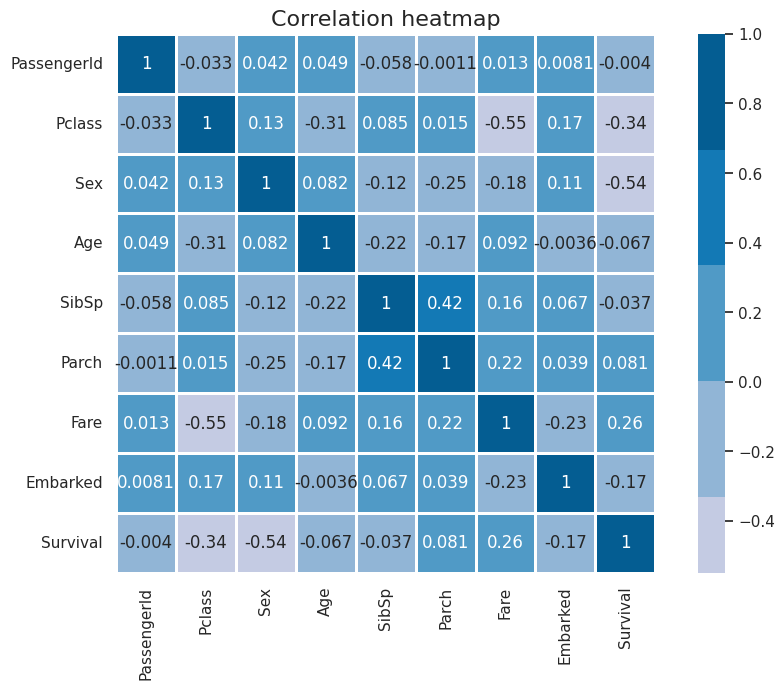

In [ ]:
# Let's calculate the correlation matrix
corr_mat = titanicData.corr()
# And let's create the heatmap plot using seaborn
fig, ax = plt.subplots(figsize=(11, 7))
# And this will set the color
cmap = sns.color_palette("PuBu")
sns.heatmap(corr_mat, cmap=cmap, linewidths=1, annot=True, square=True, center=0)
plt.title("Correlation heatmap", size=16)
plt.show()

In [ ]:
# This creates a new feature for family size
titanicData['FamilySize'] = titanicData['SibSp'] + titanicData['Parch'] + 1

In [ ]:
# This creates a new feature called "IsAlone" by checking if the family size is equal to 1. (single person)
titanicData['IsAlone'] = (titanicData['FamilySize'] == 1).astype(int)

In [ ]:
# This calculate the fare per person if the passenger is traveling with family
titanicData['FarePerPerson'] = titanicData['Fare'] / titanicData['FamilySize']

In [ ]:
titanicData['FarePerPerson'] = titanicData['FarePerPerson'].clip(lower=0)

In [ ]:
bins = [0, 12, 18, 35, 60, 100]  # This variable defines and creates the new age categories
labels = ['Child', 'Teenager', 'Adult', 'MidAge', 'Senior'] # This defines the new categories
titanicData['AgeGroup'] = pd.cut(titanicData['Age'], bins=bins, labels=labels)

In [ ]:
titanicData['AgeGroup'] = titanicData['AgeGroup'].cat.add_categories('Unknown')

In [ ]:
titanicData.fillna({'AgeGroup': 'Unknown'}, inplace=True)

In [ ]:
titanicData = pd.get_dummies(titanicData, columns=['AgeGroup'], drop_first=True)

In [ ]:
# This creates the LabelEncoder instance
label_encoder = LabelEncoder()
# This will fit and transform the 'Embarked' column
titanicData['AgeGroup_Teenager'] = label_encoder.fit_transform(titanicData['AgeGroup_Teenager'])
titanicData['AgeGroup_Adult'] = label_encoder.fit_transform(titanicData['AgeGroup_Adult'])
titanicData['AgeGroup_MidAge'] = label_encoder.fit_transform(titanicData['AgeGroup_MidAge'])
titanicData['AgeGroup_Senior'] = label_encoder.fit_transform(titanicData['AgeGroup_Senior'])
titanicData['AgeGroup_Unknown'] = label_encoder.fit_transform(titanicData['AgeGroup_Unknown'])
# This is printing the results
print(titanicData.head())

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survival  \
0            1     3.0    1  22.0    1.0    0.0   7.2500         2       0.0   
1            2     1.0    0  38.0    1.0    0.0  71.2833         0       1.0   
2            3     3.0    0  26.0    0.0    0.0   7.9250         2       1.0   
3            4     1.0    0  35.0    1.0    0.0  53.1000         2       1.0   
4            5     3.0    1  35.0    0.0    0.0   8.0500         2       0.0   

   FamilySize  IsAlone  FarePerPerson  AgeGroup_Teenager  AgeGroup_Adult  \
0         2.0        0        3.62500                  0               1   
1         2.0        0       35.64165                  0               0   
2         1.0        1        7.92500                  0               1   
3         2.0        0       26.55000                  0               1   
4         1.0        1        8.05000                  0               1   

   AgeGroup_MidAge  AgeGroup_Senior  AgeGroup_Unknown  
0     

In [ ]:
print(titanicData.isnull().sum())

PassengerId          0
Pclass               0
Sex                  0
Age                  0
SibSp                0
Parch                0
Fare                 0
Embarked             0
Survival             0
FamilySize           0
IsAlone              0
FarePerPerson        0
AgeGroup_Teenager    0
AgeGroup_Adult       0
AgeGroup_MidAge      0
AgeGroup_Senior      0
AgeGroup_Unknown     0
dtype: int64


In [ ]:
# This removes "PassengerId" column
titanicData.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
# This will engineer a new feature based on the age group column
titanicData['AgeGroup'] = 0
age_groups = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'] # This creates 8 age groups
# This will split the passengers into age groups of 10 years
titanicData['AgeGroup'] = pd.cut(titanicData['Age'], range(0, 90, 10), labels=age_groups)
def age_group_summary(df, age_groups):
    """This function will compute the summary result based on age groups."""
    # This calculates the survival rates and counts based on age groups
    age_survival = df[['AgeGroup', 'Survival']].groupby('AgeGroup').agg(['mean', 'count', 'sum'])
    # This retrieves the right order for the computed dataframe
    age_survival = age_survival.reindex(age_groups)
    # This is changing the column headers
    age_survival.columns = age_survival.columns.droplevel() # This removes the multilevel index
    age_survival.columns = ['Survival rate', 'Total', 'Survival']
    # This will create a new column with the number of passengers who did not survive
    age_survival['Died'] = age_survival['Total'] - age_survival['Survival']
    return age_survival
# This calculates the survival rates based on age groups
age_survival = age_group_summary(titanicData, age_groups)
age_survival

<ipython-input-82-fd5a20aa78ab>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df[['AgeGroup', 'Survival']].groupby('AgeGroup').agg(['mean', 'count', 'sum'])


,Survival rate,Total,Survival,Died
AgeGroup,,,,
1-10,0.584615,65,38.0,27.0
11-20,0.362416,149,54.0,95.0
21-30,0.344948,287,99.0,188.0
31-40,0.421296,216,91.0,125.0
41-50,0.348624,109,38.0,71.0
51-60,0.404762,42,17.0,25.0
61-70,0.235294,17,4.0,13.0
71-80,0.200000,5,1.0,4.0


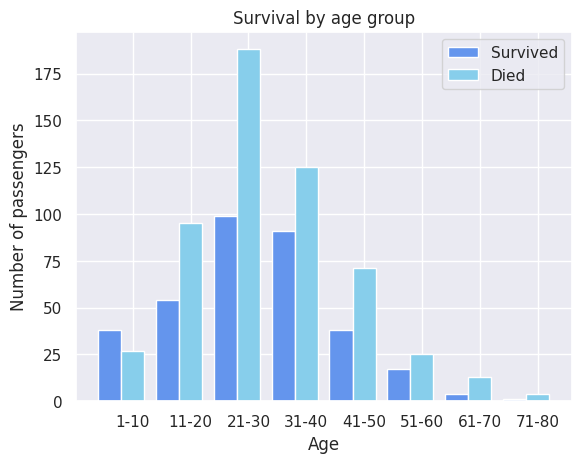

In [ ]:
# This will create the vector for the bar positions
vector = np.arange(len(age_survival))
width = 0.4 # Setting the bar width
# Creating and plotting the bar chart
fig, ax = plt.subplots()
survived = age_survival['Survival'].values
bar1 = ax.bar(vector, survived, width=width, color='cornflowerblue', label='Survived')
died = age_survival['Died'].values
bar2 = ax.bar(vector + width, died, width=width, color='skyblue',
              label='Died')
ax.set(xlabel='Age', xticks=(vector + width), xticklabels=age_groups, ylabel='Number of passengers',
       title='Survival by age group')
plt.legend()
plt.show()

<ipython-input-82-fd5a20aa78ab>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df[['AgeGroup', 'Survival']].groupby('AgeGroup').agg(['mean', 'count', 'sum'])
<ipython-input-82-fd5a20aa78ab>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df[['AgeGroup', 'Survival']].groupby('AgeGroup').agg(['mean', 'count', 'sum'])


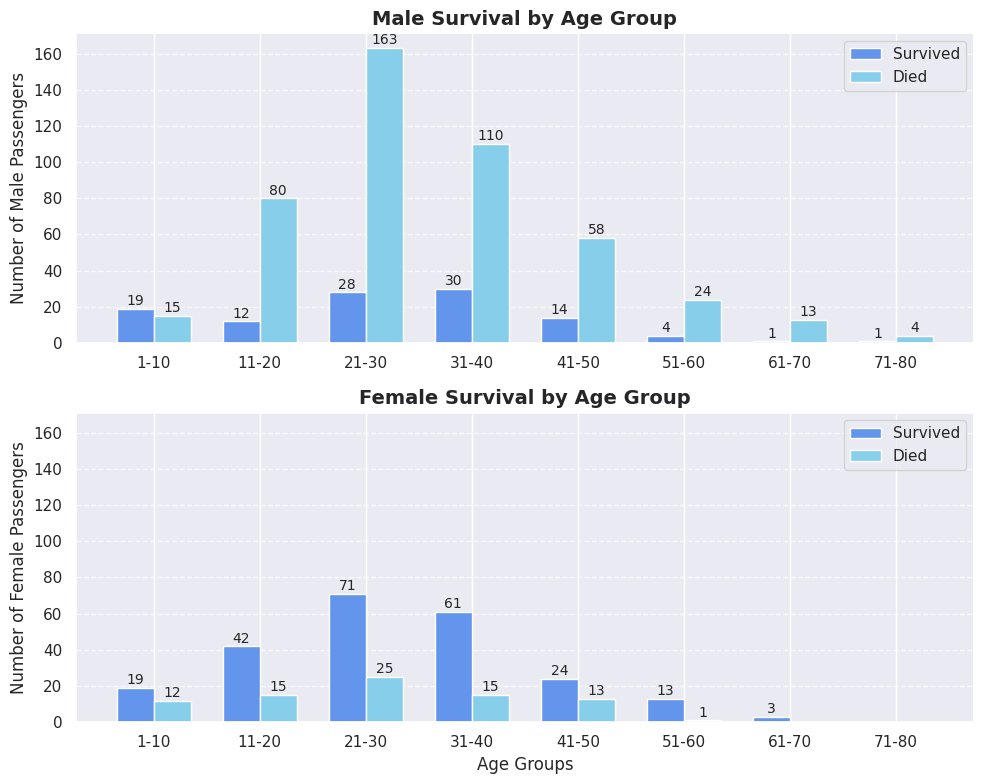

In [ ]:
# This separates the data by sex
men_data = titanicData.loc[titanicData['Sex'] == 1]
women_data = titanicData.loc[titanicData['Sex'] == 0]
# This computes the survival rates for age groups
male_age_survival = age_group_summary(men_data, age_groups)
female_age_survival = age_group_summary(women_data, age_groups)
# This adds the bar positioning
ind = np.arange(len(male_age_survival))
width = 0.35  # This is adjusting the bar width
# This will create the figure and the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharey=True)
# This will create the male bar plot
bar11 = ax1.bar(ind - width/2, male_age_survival['Survival'], width=width, color='cornflowerblue', label='Survived')
bar12 = ax1.bar(ind + width/2, male_age_survival['Died'], width=width, color='skyblue', label='Died')
# This will create the female bar plot
bar21 = ax2.bar(ind - width/2, female_age_survival['Survival'], width=width, color='cornflowerblue', label='Survived')
bar22 = ax2.bar(ind + width/2, female_age_survival['Died'], width=width, color='skyblue', label='Died')
# This will format the male plot
ax1.set_xticks(ind)
ax1.set_xticklabels(age_groups, fontsize=11)
ax1.set_ylabel('Number of Male Passengers', fontsize=12)
ax1.set_title('Male Survival by Age Group', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.7)
# This will format the female plot
ax2.set_xticks(ind)
ax2.set_xticklabels(age_groups, fontsize=11)
ax2.set_xlabel('Age Groups', fontsize=12)
ax2.set_ylabel('Number of Female Passengers', fontsize=12)
ax2.set_title('Female Survival by Age Group', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.7)
# This is adding labels to bars
for bars in [bar11, bar12, bar21, bar22]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax = ax1 if bar in bar11 or bar in bar12 else ax2
            ax.text(bar.get_x() + bar.get_width()/2, height + 2, str(int(height)), ha='center', fontsize=10)
# This will adjust the layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
# This is calculating the survival rates based on family sizes
family_survival = titanicData[['FamilySize', 'Survival']].groupby('FamilySize').mean()
family_survival

,Survival
FamilySize,
1.0,0.305400
2.0,0.550000
3.0,0.578431
4.0,0.724138
5.0,0.200000
6.0,0.136364
7.0,0.333333
8.0,0.000000
11.0,0.000000


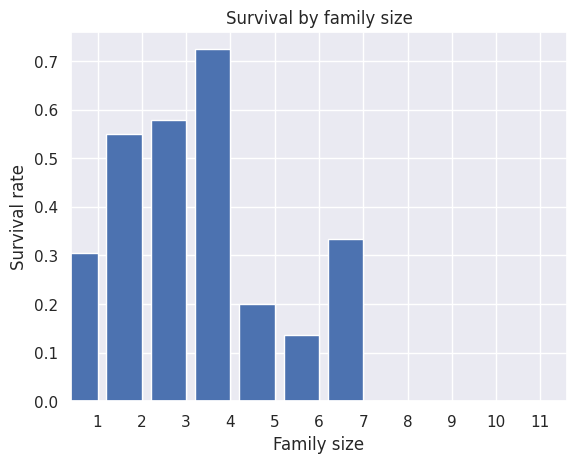

In [ ]:
# This will create the vector for the bar positions
vector = np.arange(1, np.max(family_survival.index.values) + 1)
# This adds empty entries to the survival rates retrieving the same data points similar to the vector bar position.
family_survival = family_survival.reindex(vector)
width = 0.8
# This will plot the bar chart
fig, ax = plt.subplots()
survival_rates = family_survival['Survival'].values
ax.bar(vector, survival_rates, width)
ax.set(xlabel='Family size', xticks=vector + width/2, xticklabels=vector.astype(int), xlim=[0.8, 12], ylabel='Survival rate',
       title='Survival by family size')
plt.show()

<ipython-input-87-dd75e1108c1a>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_fare = titanicData[['FareClass', 'Survival']].groupby(['FareClass']).mean()


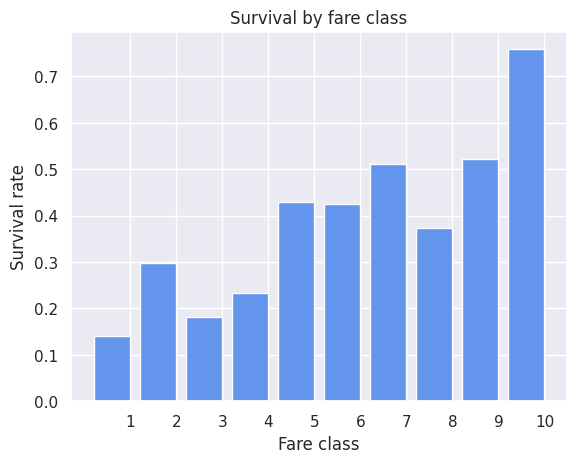

In [ ]:
# This will create a new feature named as "FareClass" creating 10 new fare classes
titanicData["FareClass"] = pd.qcut(titanicData['Fare'], 10)
# This will calculate the mean survival rates for every fare class
surv_fare = titanicData[['FareClass', 'Survival']].groupby(['FareClass']).mean()
# This will set the vector for the bar positions
vector = np.arange(len(surv_fare))
# Setting the bar width
width = 0.8
# This will plot the bar chart
fig, ax = plt.subplots()
ax.bar(vector, surv_fare['Survival'], width, color='cornflowerblue')
ax.set(xlabel='Fare class', xticks=(vector + width/2), xticklabels=np.arange(1, 11), ylabel='Survival rate',
       title='Survival by fare class')
plt.show()

### **2.4. Data Splitting**

In [ ]:
# Note we are using the whole dataset - not a robust pipeline!
X = np.array(titanicData[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
                           'Fare', 'Embarked', 'FamilySize',
                           'IsAlone', 'FarePerPerson', 'AgeGroup_Teenager', 'AgeGroup_Adult',
                           'AgeGroup_MidAge', 'AgeGroup_Senior']])

y = np.array(titanicData[['Survival']]).ravel()  # Convert y to 1D array
# Train-test split
raw_X_train, raw_X_test, y_train, y_test = train_test_split(X, y, test_size=0.1573, shuffle=True, random_state=42)
X.shape, raw_X_train.shape, raw_X_test.shape

((890, 14), (750, 14), (140, 14))

### **2.5. Feature Scaling**

In [ ]:
scaler = StandardScaler() # Here is our standardisation object

##########
# Training
##########
scaler.fit(raw_X_train) # calculate the mean and variance for each feature and store to attributes
X_train = scaler.transform(raw_X_train) # standardize X_train

### **2.5. Pre-Processing Summary**

In [ ]:
print(titanicData.isnull().sum())

Pclass               0
Sex                  0
Age                  0
SibSp                0
Parch                0
Fare                 0
Embarked             0
Survival             0
FamilySize           0
IsAlone              0
FarePerPerson        0
AgeGroup_Teenager    0
AgeGroup_Adult       0
AgeGroup_MidAge      0
AgeGroup_Senior      0
AgeGroup_Unknown     0
AgeGroup             0
FareClass            0
dtype: int64


## **3. Machine Learning Models**

### **3.1. Logistic Regression**

Accuracy: 0.8500
Precision: 0.8167
Recall: 0.8305
F1 Score: 0.8235
Balanced Accuracy: 0.8474
Macro averaged F1 Score: 0.8465
Weighted averaged F1 Score: 0.8502
Confusion matrix: 
 [[0.5        0.07857143]
 [0.07142857 0.35      ]]
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        81
         1.0       0.82      0.83      0.82        59

    accuracy                           0.85       140
   macro avg       0.85      0.85      0.85       140
weighted avg       0.85      0.85      0.85       140

Fitting 3 folds for each of 120 candidates, totalling 360 fits
{'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
LogisticRegression(C=10, random_state=0)
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        81
         1.0       0.81      0.81      0.81        59

    accuracy                           0.84       140
   macro avg       0.84      0.84      0.84       140
weighted avg       0

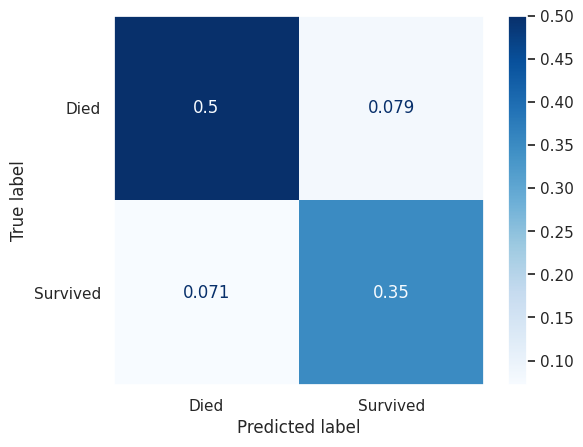

In [ ]:
################
# Initialisation
################
model = LogisticRegression(random_state=0) # Create our prediction model object
model.fit(X_train, y_train) # fit our logistic regression model - 'train' the model

############
# Evaluation
############
X_test=scaler.transform(raw_X_test)#Standardise the feature matrix to get our 'final' training data feature matrix
y_pred = model.predict(X_test) # Use our fitted logistic regression model to make a prediction based on teh validation dataset

# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.4f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.4f}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_pred)))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_test, y_pred)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred, average='macro')))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_pred, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['Died', 'Survived']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
# Note, the Precision/Recall/F1 in the report match the positive class (1.0) in the report
print(sklearn.metrics.classification_report(y_test, y_pred))

# defining parameter range
param_grid = {'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
              'max_iter' : [100,1000,2500,5000],
              'C': [0.001,0.01,0.1,1,10,100]}

grid = GridSearchCV(model, param_grid, cv=3, verbose=True, n_jobs=-1)

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions_lr = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_lr))

print('Accuracy: {:.4f}'.format(accuracy_score(y_test, grid_predictions_lr)))
print('Precision: {:.4f}'.format(precision_score(y_test, grid_predictions_lr)))
print('Recall: {:.4f}'.format(recall_score(y_test, grid_predictions_lr)))
print('F1 Score: {:.4f}'.format(f1_score(y_test, grid_predictions_lr)))

### **3.2. Support Vector Classifier**

Accuracy: 0.8786
Precision: 0.8750
Recall: 0.8305
F1 Score: 0.8522
Balanced Accuracy: 0.8720
Macro averaged F1 Score: 0.8746
Weighted averaged F1 Score: 0.8781
Confusion matrix: 
 [[0.52857143 0.05      ]
 [0.07142857 0.35      ]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90        81
         1.0       0.88      0.83      0.85        59

    accuracy                           0.88       140
   macro avg       0.88      0.87      0.87       140
weighted avg       0.88      0.88      0.88       140

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=

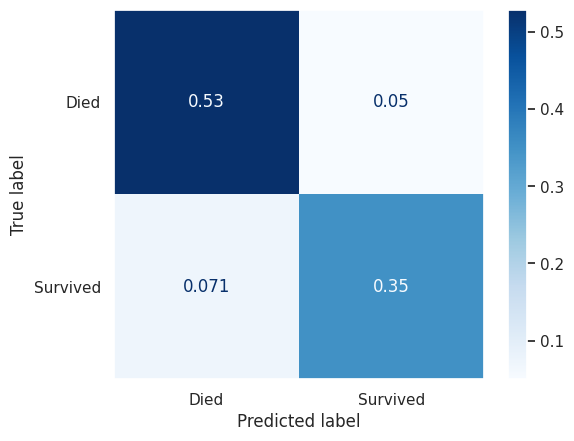

In [ ]:
################
# Initialisation
################
model2 = SVC() # Create our prediction model object
scaler = StandardScaler() # Here is our standardisation object

##########
# Training
##########
scaler.fit(raw_X_train) # calculate the mean and variance for each feature and store to attributes
X_train = scaler.transform(raw_X_train) # standardize X_train
model2.fit(X_train, y_train) # fit our logistic regression model - 'train' the model

############
# Evaluation
############
X_test=scaler.transform(raw_X_test)#Standardise the feature matrix to get our 'final' training data feature matrix
y_pred = model2.predict(X_test) # Use our fitted logistic regression model to make a prediction based on teh validation dataset
# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.4f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.4f}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_pred)))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_test, y_pred)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred, average='macro')))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_pred, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['Died', 'Survived']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
# Note, the Precision/Recall/F1 in the report match the positive class (1.0) in the report
print(sklearn.metrics.classification_report(y_test, y_pred))

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(model2, param_grid, refit=True, verbose=3)

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions_svc = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_svc))

print('Accuracy: {:.4f}'.format(accuracy_score(y_test, grid_predictions_svc)))
print('Precision: {:.4f}'.format(precision_score(y_test, grid_predictions_svc)))
print('Recall: {:.4f}'.format(recall_score(y_test, grid_predictions_svc)))
print('F1 Score: {:.4f}'.format(f1_score(y_test, grid_predictions_svc)))

### **3.3. k-Nearest Neighbors**

Accuracy: 0.8000
Precision: 0.7541
Recall: 0.7797
F1 Score: 0.7667
Balanced Accuracy: 0.7972
Macro averaged F1 Score: 0.7958
Weighted averaged F1 Score: 0.8004
Confusion matrix: 
 [[0.47142857 0.10714286]
 [0.09285714 0.32857143]]
              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82        81
         1.0       0.75      0.78      0.77        59

    accuracy                           0.80       140
   macro avg       0.79      0.80      0.80       140
weighted avg       0.80      0.80      0.80       140

Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=15)
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86        81
         1.0       0.87      0.69      0.77        59

    accuracy                           0.83       140
   macro avg       0.84      0.81      0.82       140
weight

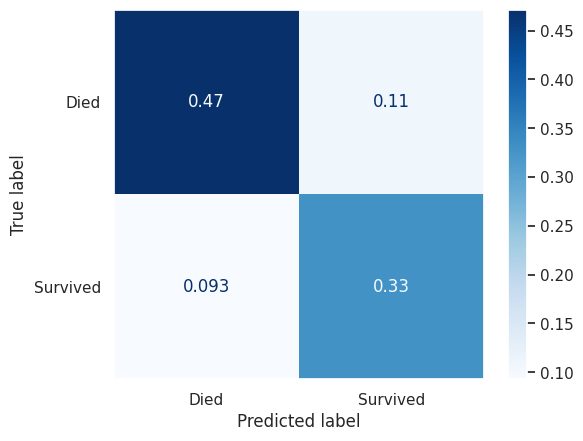

In [ ]:
################
# Initialisation
################
model3 = KNeighborsClassifier() # Create our prediction model object
scaler = StandardScaler() # Here is our standardisation object

##########
# Training
##########
scaler.fit(raw_X_train) # calculate the mean and variance for each feature and store to attributes
X_train = scaler.transform(raw_X_train) # standardize X_train
model3.fit(X_train, y_train) # fit our logistic regression model - 'train' the model

############
# Evaluation
############
X_test=scaler.transform(raw_X_test)#Standardise the feature matrix to get our 'final' training data feature matrix
y_pred = model3.predict(X_test) # Use our fitted logistic regression model to make a prediction based on teh validation dataset
# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.4f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.4f}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_pred)))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_test, y_pred)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred, average='macro')))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_pred, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['Died', 'Survived']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
# Note, the Precision/Recall/F1 in the report match the positive class (1.0) in the report
print(sklearn.metrics.classification_report(y_test, y_pred))

# defining parameter range
param_grid = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid = GridSearchCV(model3, param_grid, verbose=1, cv=3, n_jobs=-1)

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions_knn = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_knn))

print('Accuracy: {:.4f}'.format(accuracy_score(y_test, grid_predictions_knn)))
print('Precision: {:.4f}'.format(precision_score(y_test, grid_predictions_knn)))
print('Recall: {:.4f}'.format(recall_score(y_test, grid_predictions_knn)))
print('F1 Score: {:.4f}'.format(f1_score(y_test, grid_predictions_knn)))

### **3.4. Evaluation Metrics**

In [ ]:
# This will set the list of models
models = {
    "LRC": model,     # Logistic Regression Model
    "SVC": model2,    # Support Vector Classifier
    "kNN": model3,    # K-Nearest Neighbors
}

# This creates the LaTeX Table Header
latex_table = """
\\begin{table}[ht]
\\centering
\\begin{tabular}{|l|c|c|c|c|c|c|c|}
\\hline
Model & Accuracy & Precision & Recall & F1 Score & Balanced Acc & Macro F1 & Weighted F1 \\\\
\\hline
"""
# This will through each model, fit it, predict, and compute the metrics
for model_name, model in models.items():
    # This will fit the model
    model.fit(X_train, y_train)
    # This will make predictions on the test set
    y_pred = model.predict(X_test)
    # This computes the classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    # This will add the model results to the LaTeX table
    latex_table += f"{model_name} & {accuracy:.4f} & {precision:.4f} & {recall:.4f} & {f1:.4f} & {balanced_acc:.4f} & {macro_f1:.4f} & {weighted_f1:.4f} \\\\ \n"
# This creates the LaTeX Table Footer
latex_table += """
\\hline
\\end{tabular}
\\caption{Classification Model Performance Metrics}
\\end{table}
"""
print(latex_table)


\begin{table}[ht]
\centering
\begin{tabular}{|l|c|c|c|c|c|c|c|}
\hline
Model & Accuracy & Precision & Recall & F1 Score & Balanced Acc & Macro F1 & Weighted F1 \\
\hline
LRC & 0.8500 & 0.8167 & 0.8305 & 0.8235 & 0.8474 & 0.8465 & 0.8502 \\ 
SVC & 0.8786 & 0.8750 & 0.8305 & 0.8522 & 0.8720 & 0.8746 & 0.8781 \\ 
kNN & 0.8000 & 0.7541 & 0.7797 & 0.7667 & 0.7972 & 0.7958 & 0.8004 \\ 

\hline
\end{tabular}
\caption{Classification Model Performance Metrics}
\end{table}



In [ ]:
# This creates a new LaTeX Table with the new evaluation metrics based on the cross-validation method applied
latex_table = f"""
\\begin{{table}}[h]
    \\centering
    \\begin{{tabular}}{{lcccc}}
        \\hline
        Model & Accuracy & Precision & Recall & F1 Score \\\\
        \\hline
        LRC & {accuracy_score(y_test, grid_predictions_lr):.4f} & {precision_score(y_test, grid_predictions_lr):.4f} & {recall_score(y_test, grid_predictions_lr):.4f} & {f1_score(y_test, grid_predictions_lr):.4f} \\\\
        SVC & {accuracy_score(y_test, grid_predictions_svc):.4f} & {precision_score(y_test, grid_predictions_svc):.4f} & {recall_score(y_test, grid_predictions_svc):.4f} & {f1_score(y_test, grid_predictions_svc):.4f} \\\\
        KNN & {accuracy_score(y_test, grid_predictions_knn):.4f} & {precision_score(y_test, grid_predictions_knn):.4f} & {recall_score(y_test, grid_predictions_knn):.4f} & {f1_score(y_test, grid_predictions_knn):.4f} \\\\
        \\hline
    \\end{{tabular}}
    \\caption{{Performance metrics for different models}}
    \\label{{tab:model_metrics}}
\\end{{table}}
"""

print(latex_table)


\begin{table}[h]
    \centering
    \begin{tabular}{lcccc}
        \hline
        Model & Accuracy & Precision & Recall & F1 Score \\
        \hline
        LRC & 0.8429 & 0.8136 & 0.8136 & 0.8136 \\
        SVC & 0.8857 & 0.8772 & 0.8475 & 0.8621 \\
        KNN & 0.8286 & 0.8723 & 0.6949 & 0.7736 \\
        \hline
    \end{tabular}
    \caption{Performance metrics for different models}
    \label{tab:model_metrics}
\end{table}

